![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# WEEK 2: Assignements

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-10-10)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/DSF_WEEK_2_EXERCISES.ipynb)

# Exercise 1: getting around GIT [OPTIONAL]

You will be provided with further slides on next Tuesday class (15/10/2019). Meanwhile you can try to do the following:

* Create a GitHub account
* Fork the [repository](https://github.com/vfp1/bts-mbds-data-science-foundations-2019) from the course
* Clone the repository in your own computer using `git clone`
* Create a folder within `/sessions` where you will be creating your own notebooks. Since we are using notebooks, it is better that you leave the nootebooks from the course untouched, and that you rather create a copy of them in the  `/sessions` folder where you can edit them. Trust me, it will save you a lot of **merge conflict** problems.
* Sync your fork to the remote origin (the original repo of the course) so you can update it with the new notebooks that I will be adding. Follow [this tutorial](https://help.github.com/en/articles/syncing-a-fork).
* Return this exercise by commiting the whole notebook in your own git and pass the url to me

# Exercise 2: more bikes [OBLIGATORY]

Given [this](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv) dataset:

* Open the dataset using Pandas
* Display the DataFrame
* Describe the DataFrame, can we already see some trends in regards to volume of bikes per region?
* Reply to the following questions (either by plotting the graph and summarizing the values):

    * In each one of the years from the dataset. Which is the month with the highest number of bikes?
        * Plot each year with the number of bikes to also see it visually.
    * In Total, when are the hours with the least amount of riders? Take into consideration all days of the week.
        * Plot the hours with the average amount of riders.
    * In the current year, which is the best route to bike with less people? Use the average of bikers during the whole year.
        * Plot the bikers per hour using yearly average
        * When is best to ride with less people between 10 to 15 in weekdays using the average of 2019?
        * Plot the amount of bikers during those hours on weekdays

In [10]:
import pandas as pd

bikes = pd.read_csv('https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv', sep=',', index_col='Date', parse_dates=True)
print(bikes.shape)
bikes.head(10)


(61296, 2)


,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2015-02-24 02:00:00,3.0,3.0
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2016-02-15 00:00:00,3.0,3.0
2019-01-01 02:00:00,1.0,11.0
2019-01-01 03:00:00,1.0,2.0
2019-01-01 04:00:00,2.0,1.0
2019-01-01 05:00:00,3.0,1.0
2019-01-01 06:00:00,4.0,7.0


In [14]:
bikes.columns = ['East', 'West']
bikes['Total'] = bikes.eval('East + West')

In [15]:
bikes.describe()

,East,West,Total
count,61287.000000,61287.000000,61287.000000
mean,52.894790,61.444874,114.339664
std,67.815951,89.875981,145.211368
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,30.000000,62.000000
75%,71.000000,74.000000,150.000000
max,698.000000,850.000000,1097.000000


In genereal, it seems that on the west side there are more bikes per day as the mean is higher. Also, the quartiles, medium and max are higher.

In [45]:
highest_year = bikes.groupby([(bikes.index.year),(bikes.index.month)]).mean()
highest_year.index.names = ['Year','Month']
highest_year.head()

East       West      Total
Year Month                                 
2012 10     48.511494  45.877874  94.389368
     11     36.197222  34.145833  70.343056
     12     25.010753  23.872312  48.883065
2013 1      30.793011  29.534946  60.327957
     2      38.538690  35.906250  74.444940

In [48]:
highest_year.sort_values(by=['Year', 'Total'], ascending=False)

East        West       Total
Year Month                                   
2019 8      70.483871  120.932796  191.416667
     7      71.459677  113.639785  185.099462
     6      72.188889  111.855556  184.044444
     5      69.272849  104.279570  173.552419
     9      57.568056   98.229167  155.797222
...               ...         ...         ...
2013 1      30.793011   29.534946   60.327957
     12     30.344086   28.194892   58.538978
2012 10     48.511494   45.877874   94.389368
     11     36.197222   34.145833   70.343056
     12     25.010753   23.872312   48.883065

[84 rows x 3 columns]

In [53]:
final_highest_year = highest_year.loc[highest_year.groupby("Year")["Total"].idxmax()]
final_highest_year

,,East,West,Total
Year,Month,,,
2012,10,48.511494,45.877874,94.389368
2013,7,80.662634,77.904570,158.567204
2014,7,82.217742,79.971774,162.189516
2015,6,79.272222,78.668056,157.940278
2016,5,76.068548,77.370968,153.439516
2017,8,66.891129,94.651882,161.543011
2018,5,72.836022,101.643817,174.479839
2019,8,70.483871,120.932796,191.416667


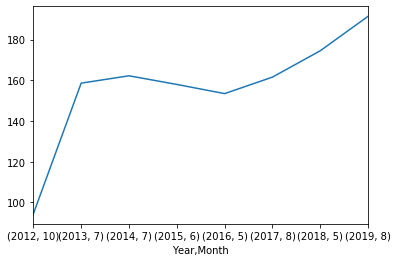

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

final_highest_year.Total.plot.line()

numpy.ndarray

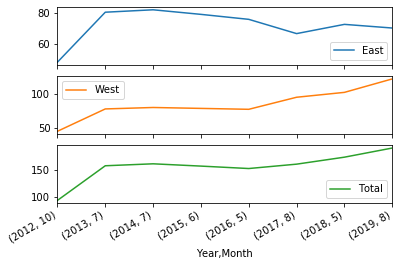

In [65]:
axes = final_highest_year.plot.line(subplots=True)
type(axes)

In [69]:
peak_hour = bikes.groupby([(bikes.index.hour)]).mean()
peak_hour

,East,West,Total
Date,,,
0,5.054816,6.795223,11.850039
1,2.825764,3.447925,6.273688
2,2.003923,2.125539,4.129463
3,1.567737,1.469851,3.037588
4,3.551292,3.142913,6.694205
5,16.352388,10.074393,26.426782
6,56.413469,36.033673,92.447142
7,147.527408,85.638998,233.166406
8,198.488254,131.081441,329.569695


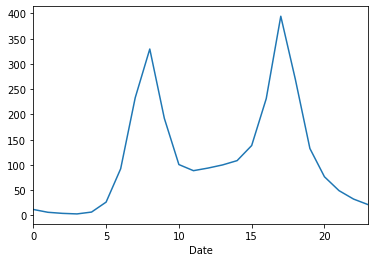

In [71]:
peak_hour.Total.plot.line()

In [75]:
highest_hour = bikes.groupby([(bikes.index.year),(bikes.index.hour)]).mean()
highest_hour.index.names = ['Year','Hour']
highest_hour

East        West       Total
Year Hour                                   
2012 0      4.500000    4.966667    9.466667
     1      2.922222    2.722222    5.644444
     2      2.722222    1.888889    4.611111
     3      1.211111    1.666667    2.877778
     4      3.711111    2.088889    5.800000
...              ...         ...         ...
2019 19    56.271062  102.919414  159.190476
     20    35.871795   56.029304   91.901099
     21    25.930403   33.362637   59.293040
     22    14.648352   22.047619   36.695971
     23     8.626374   14.439560   23.065934

[192 rows x 3 columns]

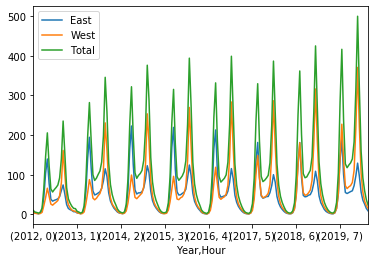

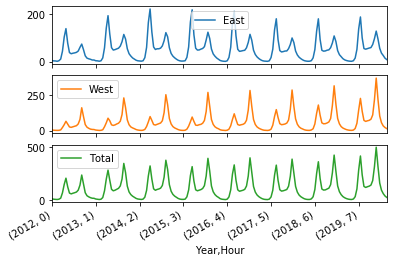

In [79]:
highest_hour.plot.line()
axes = highest_hour.plot.line(subplots=True)

When is best to ride with less people between 10 to 15 in weekdays using the average of 2019?

In [108]:
weekend = np.where(bikes.index.weekday < 5, 'Weekday', 'Weekend')
weekend
#by_time = bikes.groupby([weekend, bikes.index.time]).mean()
#by_time

array(['Weekday', 'Weekday', 'Weekday', ..., 'Weekday', 'Weekday',
       'Weekday'], dtype='<U7')

In [142]:
bikes_2019 = bikes.groupby([(bikes.index.year), (bikes.index.weekday), (bikes.index.hour)]).mean()
bikes_2019.index.names = ['Year', 'Weekday', 'Hour']
new_bikes = bikes_2019[bikes_2019.index.get_level_values('Year') ==2019]
new_bikes_2 = new_bikes[new_bikes.index.get_level_values('Weekday').isin([0,1,2,3,4])]
new_bikes_3 = new_bikes_2[new_bikes_2.index.get_level_values('Hour').isin([10,11,12,13,14,15])]
new_bikes_3

East        West       Total
Year Weekday Hour                                   
2019 0       10    55.666667   73.589744  129.256410
             11    42.794872   54.128205   96.923077
             12    44.025641   54.641026   98.666667
             13    46.717949   58.871795  105.589744
             14    49.717949   68.794872  118.512821
             15    69.256410  107.948718  177.205128
     1       10    52.051282   69.333333  121.384615
             11    41.076923   46.256410   87.333333
             12    42.846154   50.589744   93.435897
             13    41.179487   55.717949   96.897436
             14    42.948718   64.230769  107.179487
             15    59.974359  104.769231  164.743590
     2       10    52.615385   73.538462  126.153846
             11    40.615385   51.615385   92.230769
             12    42.974359   54.179487   97.153846
             13    42.769231   52.384615   95.153846
             14    41.282051   66.051282  107.333333
             15    63.461538  107.076923  170.538462
     3       10    55.641026   75.923077  131.564103
             11    48.820513   59.256410  108.076923
             12    46.666667   58.307692  104.974359
             13    49.538462   60.487179  110.025641
             14    49.153846   72.025641  121.179487
             15    65.256410  111.615385  176.871795
     4       10    50.230769   69.461538  119.692308
             11    45.666667   56.384615  102.051282
             12    43.589744   62.333333  105.923077
             13    48.846154   68.820513  117.666667
             14    51.743590   82.076923  133.820513
             15    71.179487  135.538462  206.717949

In [144]:
hour_2019 = new_bikes_3.groupby(['Hour']).mean()
hour_2019

,East,West,Total
Hour,,,
10,53.241026,72.369231,125.610256
11,43.794872,53.528205,97.323077
12,44.020513,56.010256,100.030769
13,45.810256,59.256410,105.066667
14,46.969231,70.635897,117.605128
15,65.825641,113.389744,179.215385


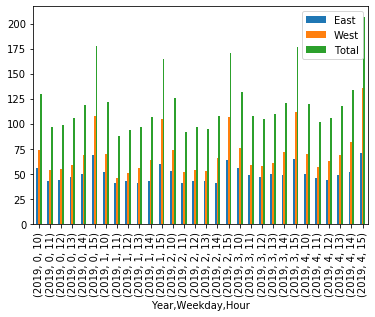

In [145]:
new_bikes_3.plot.bar()

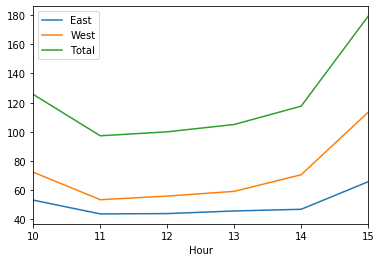

In [147]:
hour_2019.plot.line()

# Exercise 3: SQLite and Pandas [OBLIGATORY]

Download [this Sqlite database](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/flights.db)

You can either use SQLite database entirely or load the SQL query in Pandas to reply to the following questions:

*   Which is the highest city that as an airport?
*   And which is the lowest city that as an airport?
*   Retrieve the timezones and generate a dataframe with the timezones and the amount of airports in them. Plot it as a histogram as well.
*   Which country has more airlines? And which one has less?
*   Which city has the most outgoing destinations? And the least?
*   And which city has the most incoming destinations? And the least?



### Which is the highest city that as an airport?

In [157]:
import sqlite3
import time
import datetime
import random
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import style
from pandas.plotting import register_matplotlib_converters
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import shutil
import time
import os


In [159]:
import sqlite3

def create_connect_database(db_name):
    """Opens connection or creates it if it is not existent"""
    connection = sqlite3.connect(db_name)
    cursor = connection.cursor()
    
    return connection, cursor

def commit_close(connection, c, close_connection=True):
    """Commits to connection DB and closes it if close is True"""
    connection.commit()

    if close_connection is True:
        c.close()
        connection.close()
    elif close_connection is False:
        pass

In [153]:
os.getcwd()

'/Users/MarcelRos/Desktop/BTS/Data_Science_Foundations/Assignments'

In [205]:
connection, cursor = create_connect_database('/Users/MarcelRos/Desktop/BTS/GitHub/bts-mbds-data-science-foundations-2019/sessions/data/flights.db')

cursor.execute("SELECT name FROM SQLite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('airports',), ('airlines',), ('routes',)]


In [208]:
airports = "SELECT city, CAST(airports.altitude AS INTEGER) as altitude_2 FROM airports ORDER BY altitude_2 DESC;"
airports = pd.read_sql_query(airports, connection)
airports.head()

,city,altitude_2
0,Daocheng,14472
1,Bangda,14219
2,Kangding,14042
3,Shiquanhe,13780
4,Irkutsk,13411


In [207]:
airports = "SELECT city, CAST(airports.altitude AS INTEGER) as altitude_2 FROM airports ORDER BY altitude_2 DESC;"
airports = pd.read_sql_query(airports, connection)
airports_highest = airports.loc[airports['altitude_2'].idxmax()]
airports_highest

city          Daocheng
altitude_2       14472
Name: 0, dtype: object

### And which is the lowest city that as an airport?

In [211]:
airports = "SELECT city, CAST(airports.altitude AS INTEGER) as altitude_2 FROM airports ORDER BY altitude_2 ASC;"
airports = pd.read_sql_query(airports, connection)
airports

,city,altitude_2
0,Metzada,-1266
1,Eyn-yahav,-164
2,Ramsar,-70
3,Astrakhan,-65
4,Noshahr,-61
...,...,...
8102,Irkutsk,13411
8103,Shiquanhe,13780
8104,Kangding,14042
8105,Bangda,14219


In [212]:
airports = "SELECT city, CAST(airports.altitude AS INTEGER) as altitude_2 FROM airports ORDER BY altitude_2 ASC;"
airports = pd.read_sql_query(airports, connection)
airports_highest = airports.loc[airports['altitude_2'].idxmin()]
airports_highest

city          Metzada
altitude_2      -1266
Name: 0, dtype: object

### Retrieve the timezones and generate a dataframe with the timezones and the amount of airports in them. Plot it as a histogram as well.

In [221]:
timezones = "SELECT timezone, COUNT(name) FROM airports GROUP BY timezone ORDER BY COUNT(name) DESC;"
timezones = pd.read_sql_query(timezones, connection)
print(timezones.shape)
timezones.head()

(294, 2)


,timezone,COUNT(name)
0,America/New_York,628
1,America/Chicago,373
2,Europe/Berlin,319
3,America/Anchorage,258
4,Europe/Paris,232


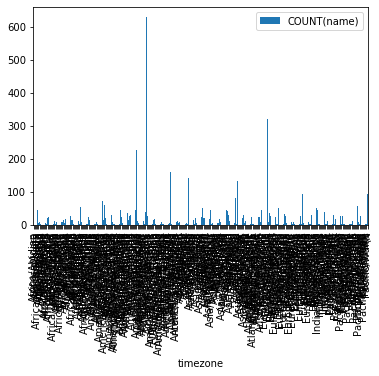

In [241]:
from matplotlib.pyplot import hist
timezones_2 = timezones.set_index('timezone').sort_index(ascending=True)
timezones_2.plot.bar()

### Which country has more airlines? And which one has less?

In [245]:
airlines_count = """SELECT country, COUNT(active) AS Airport_Count
FROM airlines 
WHERE active='Y' 
GROUP BY country 
ORDER BY COUNT(active) DESC;
"""
airlines_count = pd.read_sql_query(airlines_count, connection)
airlines_count.head()

,country,Airport_Count
0,United States,141
1,Russia,72
2,United Kingdom,40
3,Germany,37
4,Canada,34


In [275]:
airlines_count = """SELECT country, COUNT(active) AS Airport_Count
FROM airlines 
WHERE active='Y' 
GROUP BY country 
ORDER BY COUNT(active) ASC;
"""
airlines_count = pd.read_sql_query(airlines_count, connection)
airlines_count.head()

,country,Airport_Count
0,S.A.,1
1,ALASKA,1
2,AVIANCA,1
3,American Samoa,1
4,Antigua and Barbuda,1


### Which city has the most outgoing destinations? And the least?

In [259]:
outgoing ="""SELECT city,
CAST(airports.code AS TEXT) AS dest_airport
FROM routes 
INNER JOIN airports  
  ON airports.code = routes.source;"""

outgoing = pd.read_sql_query(outgoing, connection)
outgoing.head()

,city,dest_airport
0,Sochi,AER
1,Astrakhan,ASF
2,Astrakhan,ASF
3,Chelyabinsk,CEK
4,Chelyabinsk,CEK


In [260]:
outgoing['city'].value_counts().sort_values(ascending=False)

London       1232
Atlanta       915
Paris         725
Chicago       697
Shanghai      616
             ... 
Suavanao        1
Tabatinga       1
Maseru          1
Pendleton       1
Gemena          1
Name: city, Length: 3148, dtype: int64

### And which city has the most incoming destinations? And the least?

In [264]:
incoming ="""SELECT city,
CAST(airports.code AS TEXT) AS source_airport
FROM routes 
INNER JOIN airports  
  ON airports.code = routes.dest;"""

incoming = pd.read_sql_query(incoming, connection)
incoming.head()

,city,source_airport
0,Kazan,KZN
1,Kazan,KZN
2,Mineralnye Vody,MRV
3,Kazan,KZN
4,Novosibirsk,OVB


In [280]:
incoming_asc = incoming['city'].value_counts().sort_values(ascending=False)
incoming_asc.head()

London      1224
Atlanta      911
Paris        720
Chicago      682
Shanghai     620
Name: city, dtype: int64

In [279]:
incoming_desc = incoming['city'].value_counts().sort_values(ascending=True)
incoming_desc.head()

Gemena      1
Arua        1
Hamadan     1
Tainan      1
Mayaguez    1
Name: city, dtype: int64